<a href="https://colab.research.google.com/github/Thcataclismo/Thcataclismo/blob/main/An%C3%A1lise_de_bilion%C3%A1rios_com_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de bilionários com Python**

** importando as bibliotecas Python necessárias e o conjunto de dados:**

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_csv('/content/drive/MyDrive/Billionaire.csv')
dados.head()


,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


**Analisando as estatisticas da tabela:**

In [6]:
dados.describe()

,Rank,Age
count,2755.000000,2676.000000
mean,1345.663521,63.113602
std,772.669811,13.445153
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,63.000000
75%,2035.000000,73.000000
max,2674.000000,99.000000


**vamos ver se esse conjunto de dados contém ou não valores ausentes:**

In [7]:
dados.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

**Removendo valores nulos:**

In [8]:
dados.dropna()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


**A coluna NetWorth neste conjunto de dados tem um sinal $ no início do patrimônio líquido dos bilionários e B no final. Portanto, precisamos remover esses sinais e converter a coluna NetWorth para float:**

In [29]:

dados["NetWorth"] = dados["NetWorth"].str.strip("$")
dados["NetWorth"] = dados["NetWorth"].str.strip("B")
dados["NetWorth"] = dados["NetWorth"].astype(float)

**10 maiores bilionários de acordo com sua NetWorth:**

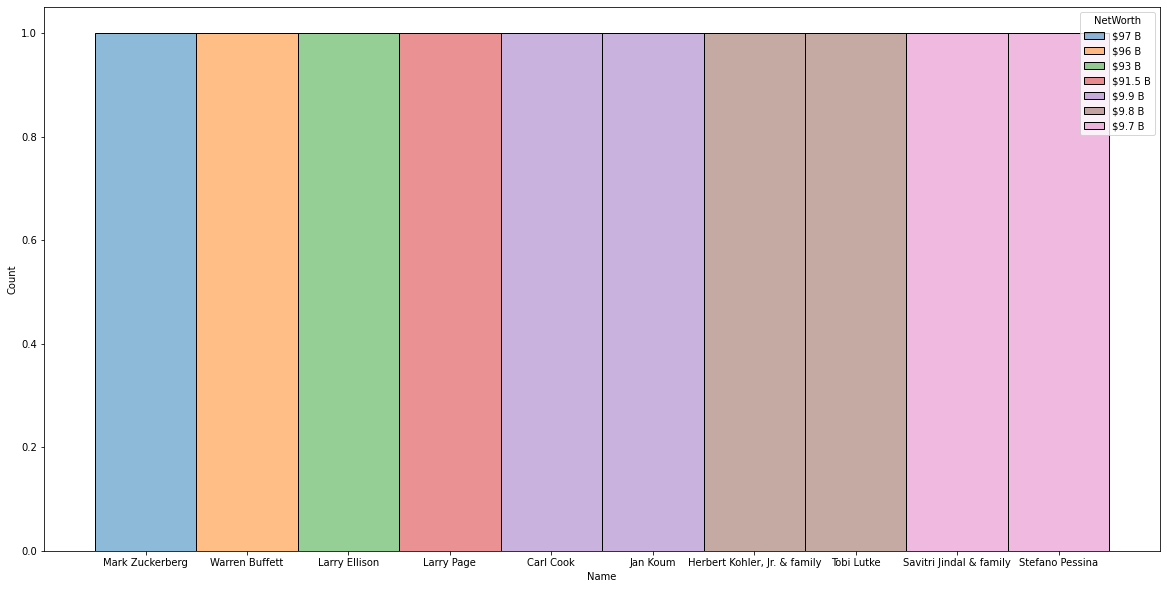

In [20]:
dados = dados.sort_values(by = ['NetWorth'], ascending=False).head(10)
plt.figure(figsize=(20, 10))
sns.histplot(x="Name", hue="NetWorth", data=dados)
plt.show()

**5 principais domínios com o maior número de bilionários:**

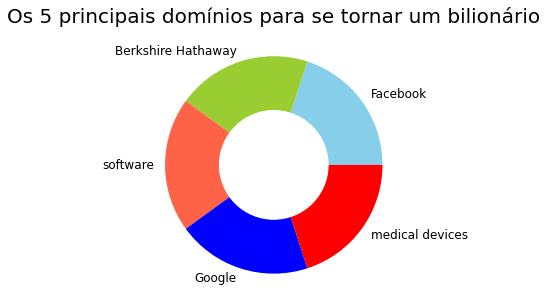

In [22]:
a = dados["Source"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Os 5 principais domínios para se tornar um bilionário", fontsize=20)
plt.show()

**5 principais indústrias com o maior número de bilionários:**

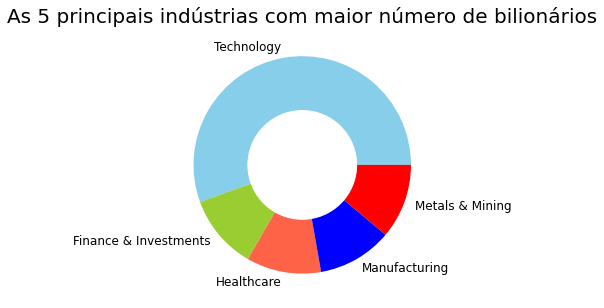

In [23]:
a = dados["Industry"].value_counts().head()
index = a.index
industries = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(industries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("As 5 principais indústrias com maior número de bilionários", fontsize=20)
plt.show()

**5 principais países com o maior número de bilionários:**

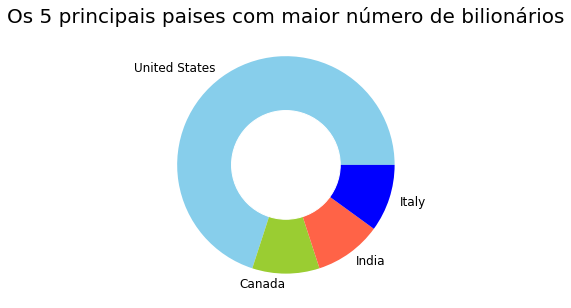

In [27]:
a = dados['Country'].value_counts().head()
index = a.index
Country = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(Country, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Os 5 principais paises com maior número de bilionários", fontsize=20)
plt.show()